## Outliers: Problem Solving Notebook

## Problem description

We have a dataset which contains airbnb prices in the boston area. The dataset is named **boston_apartments.csv**. The dataset has many feature information but we are mostly concerned with the apartment prices in the dataset. We want to find out if there exists any outliers in the `price` feature of the dataset. To avoid any inconsistent result while model application, we also need to fix those outliers with appropriate measures(discussed in the worked examples).

From the boston apartments dataset, find out if there exists any outliers in `price` feature data. If there is, remove those outliers with proper steps and check if the outliers are properly removed from `price` data.






**[only give the problem statement and let the students ccpme up with the solution]**

### Read the data from source 

As a first step , read the source data from the **boston_apartments.csv** file.

In [56]:
import pandas as pd

house=pd.read_csv("../datasets/boston_apartments.csv")
house

,id,name,host_id,host_since,host_location,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_verifications,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,3781,HARBORSIDE-Walk to subway,4804,12/3/08,Massachusetts,44%,t,East Boston,5,"['email', 'phone', 'reviews']",...,97,16,99.0,10.0,10.0,10.0,10.0,10.0,10.0,0.28
1,8789,Curved Glass Studio/1bd facing Park,26988,7/22/09,"Boston, Massachusetts, United States",83%,t,Beacon Hill,10,"['email', 'phone', 'reviews', 'jumio', 'offlin...",...,290,24,93.0,9.0,9.0,10.0,10.0,10.0,9.0,0.35
2,10730,Bright 1bed facing Golden Dome,26988,7/22/09,"Boston, Massachusetts, United States",83%,t,Beacon Hill,10,"['email', 'phone', 'reviews', 'jumio', 'offlin...",...,42,31,95.0,10.0,9.0,10.0,10.0,10.0,9.0,0.24
3,10813,"Back Bay Apt-blocks to subway, Newbury St, The...",38997,9/16/09,US,15%,f,Back Bay,13,"['email', 'phone', 'reviews', 'jumio', 'offlin...",...,0,80,98.0,10.0,10.0,10.0,10.0,10.0,10.0,2.74
4,16384,Small Room in Cambridge Kendall MIT,23078,6/24/09,"Cambridge, Massachusetts, United States",0%,f,Beacon Hill,3,"['email', 'phone', 'facebook', 'reviews', 'jum...",...,365,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2408,43148398,Spacious Queen Room in North End,297860058,9/25/19,US,44%,t,Allston-Brighton,1,"['email', 'phone', 'jumio', 'offline_governmen...",...,348,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2409,43154697,"2BD by Waterfront, 10 mins to Downtown",2356643,5/12/12,"Boston, Massachusetts, United States",100%,f,Theater District,10,"['email', 'phone', 'reviews', 'jumio', 'offlin...",...,365,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2410,43162952,波士顿长木医疗区豪华2室公寓3月起租,47921934,11/1/15,"Lexington, Massachusetts, United States",NaN,f,Mission Hill,0,"['email', 'phone', 'reviews', 'jumio', 'selfie...",...,365,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2411,43163112,BRIGHT SPACIOUS BOSTON APARTMENT,136709790,6/24/17,US,NaN,f,Fenway–Kenmore,0,"['email', 'phone', 'jumio', 'offline_governmen...",...,76,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Estimate the outliers in price data.

### What is the outlier estimation in terms of box plot?

- Plot a boxplot to look at the outliers if any.


<details>
  <summary></summary>
 
  house.boxplot(figsize = (10,10), column=['price'], fontsize= '8', grid =True)
  
</details>





### strip plot to estimate outlier:

- Q: what is distribution of the `price` in terms of scatterplot?


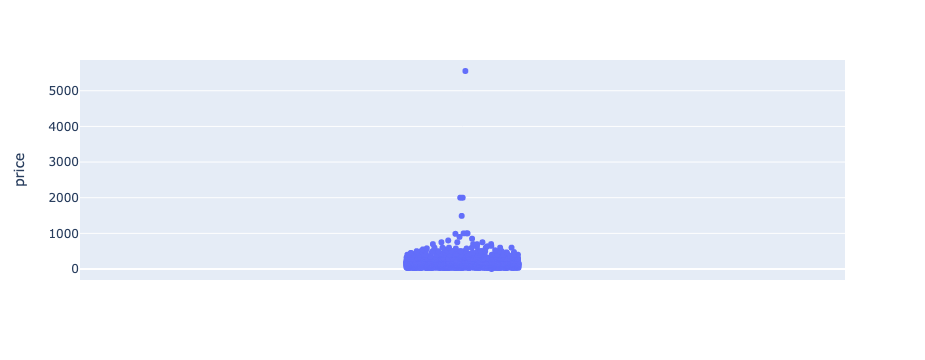

In [57]:
import plotly.express as px

house_strip = px.strip(house, y='price')

house_strip.show()


- Q: what would be the dependant and independant variables in the plot? [keep separate for last]

### using boxplot

<AxesSubplot:>

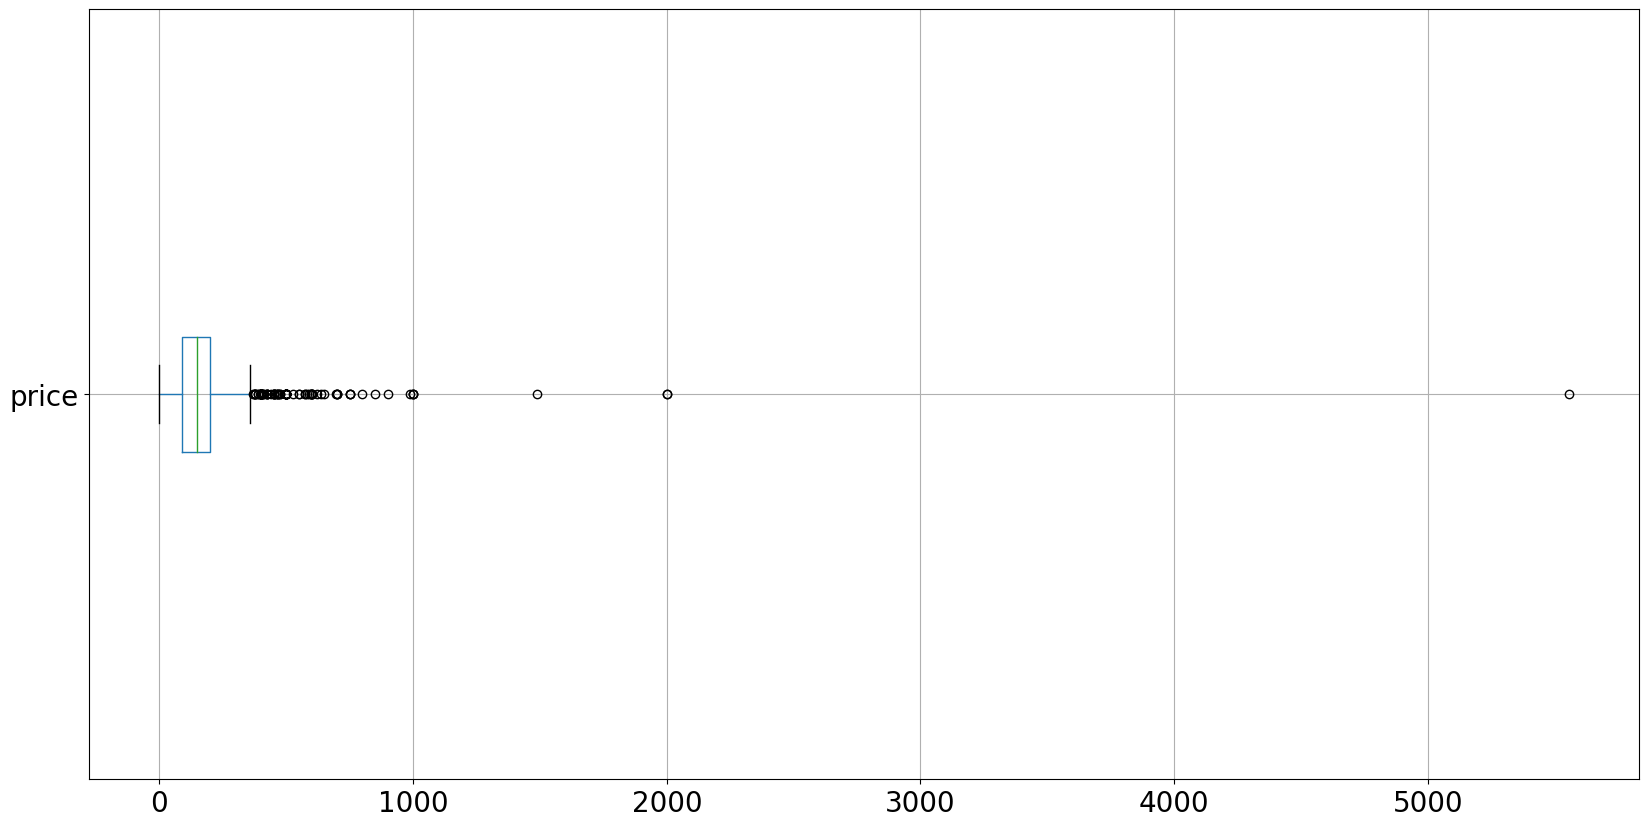

In [60]:
box_house = house.boxplot(column='price',figsize=(20,10), fontsize='20', vert=False)

box_house

### Distribution of the price by numbers?


What is the distribution of price by numbers?

In [48]:
house['price'].describe()

count    2413.000000
mean      169.232076
std       166.794578
min         0.000000
25%        90.000000
50%       149.000000
75%       200.000000
max      5555.000000
Name: price, dtype: float64

### Find the exact outlier points (using inter quartile range) 

Find out the outliers in the data.
Q. what is the q3 val in `price` data?
Q. what is the iqr for `price`?
Q. which values are actually the outliers?


### What is the upper and lower bound for outliers in price ?

In [49]:
## Find the first quartile(25%) data range for price 
q1= house['price'].quantile(.25)
print(f"q1: {q1}")

## Find the third quartile(25%) data range for price 
q3= house['price'].quantile(.75)
print(f"q3: {q3}")

## Find the inter quartile range for price data
iqr= q3 - q1
print(f"iqr: {iqr}")

q1: 90.0
q3: 200.0
iqr: 110.0


In [50]:
## find the upper and lower bound
upper_bound= q3 + 1.5*iqr
lower_bound= q1 - 1.5*iqr

print("upper bound",upper_bound)
print("lower bound",lower_bound)

upper bound 365.0
lower bound -75.0


### Find the clipping points

In [51]:
lower_point= max(lower_bound,house['price'].min())

print("lower_point", lower_point)

upper_point= min(upper_bound,house['price'].max())

print("upper_point", upper_point)

lower_point 0.0
upper_point 365.0


### Remove the outliers of price

Use clip method to remove the outlier values

In [52]:
house['price']= house['price'].clip(lower_point,upper_point)

### Check the price value distributiom after change 

In [53]:
house['price'].describe()

count    2413.000000
mean      158.620390
std        87.966049
min         0.000000
25%        90.000000
50%       149.000000
75%       200.000000
max       365.000000
Name: price, dtype: float64

### Look at the final data spread

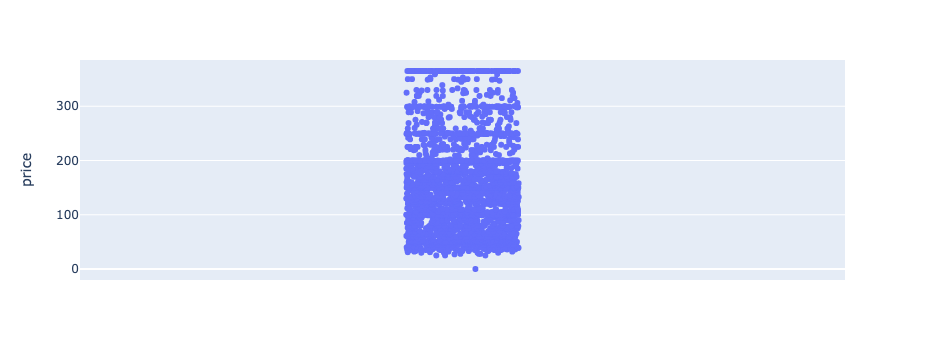

In [54]:
house_strip2 = px.strip(house, y='price')

house_strip2.show()


### Using boxplot

<AxesSubplot:>

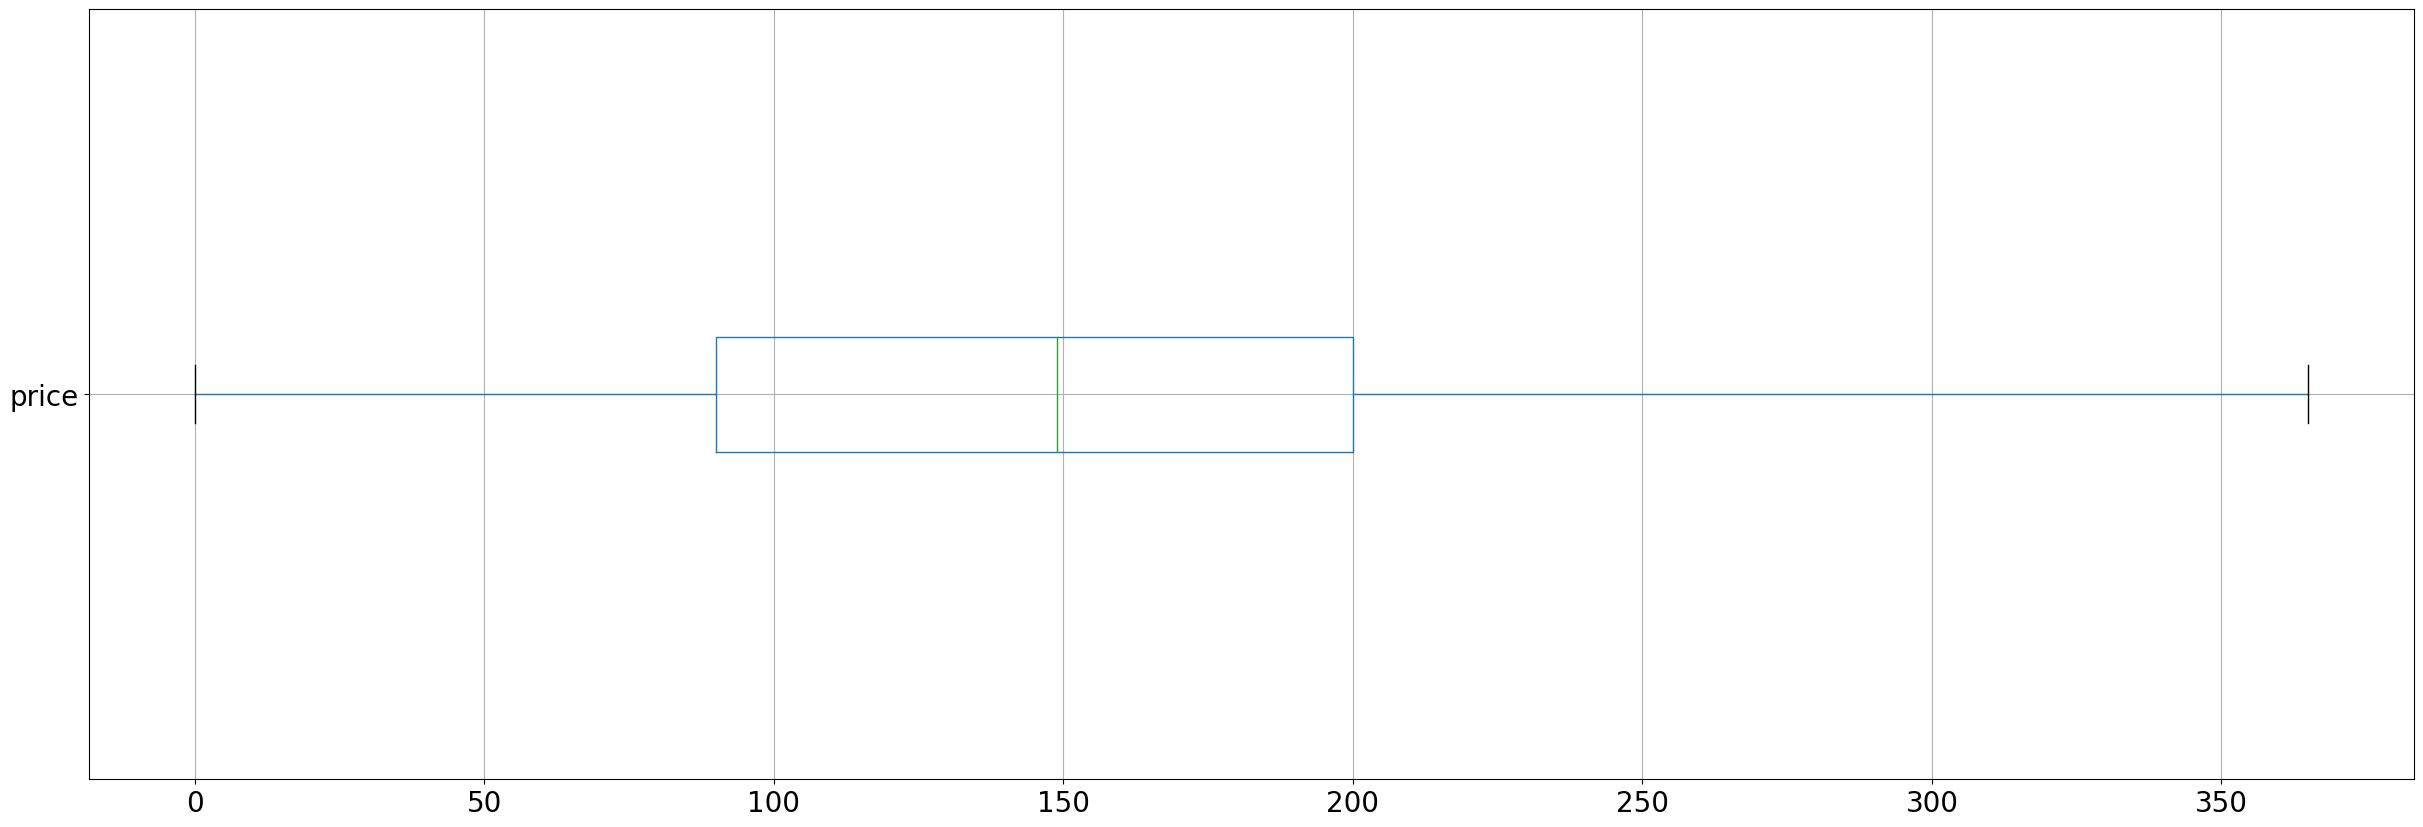

In [55]:
box_house2 = house.boxplot(column='price',figsize=(30,10), fontsize='20', vert=False)

box_house2